In [1]:
import pandas as pd
import numpy as np

In [2]:
Job_info = 'GC-210029_R4'
shrimp_number = 'SN_002'

# Importing the Data

In [3]:
df = pd.read_csv(r'C:\Users\adeni\OneDrive - KLX Energy\Shrimp&EDR Data\GC-210029Run4\SN002_CH1.txt', delimiter = ' ')

# Preprocessing and Cleaning the Data

In [4]:
df.head()

,Unnamed: 0,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*
0,NaN,0,0,0,10,131,134,20,0
1,NaN,0,0,0,1,5,4,83,0
2,NaN,0,0,0,2,5,132,20,0
3,NaN,0,0,16,0,5,4,20,0
4,NaN,0,0,0,1,5,4,20,0


In [5]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
#df.drop(columns = ['Date'], inplace=True)

In [7]:
#df.drop(columns = ['Time'], inplace=True)

In [8]:
df

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*
0,0,0,0,10,131,134,20,0
1,0,0,0,1,5,4,83,0
2,0,0,0,2,5,132,20,0
3,0,0,16,0,5,4,20,0
4,0,0,0,1,5,4,20,0
...,...,...,...,...,...,...,...,...
665310,0,0,0,0,3,4,22,0
665311,0,0,0,0,3,4,22,0
665312,0,0,0,1,4,4,22,0
665313,0,0,0,0,4,4,22,0


In [9]:
df.describe()

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*
count,665315.000000,665315.000000,665315.000000,665315.000000,665315.000000,665315.000000,665315.000000,665315.00000
mean,10.288224,93.932927,162.484846,176.575207,13.711831,19.873461,126.266474,0.25013
std,3.826470,60.370319,51.403334,51.618707,11.404836,13.182902,38.733731,4.95012
min,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,19.000000,0.00000
25%,10.000000,61.000000,152.000000,176.000000,6.000000,6.000000,117.000000,0.00000
50%,12.000000,77.000000,191.000000,199.000000,11.000000,20.000000,138.000000,0.00000
75%,12.000000,125.000000,193.000000,200.000000,16.000000,28.000000,155.000000,0.00000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000


In [10]:
df.drop(df[df['MROAVG'] > 254].index, inplace = True)

In [11]:
df.drop(df[df['LROAVG'] > 254].index, inplace = True)

In [12]:
df.drop(df[df['LROAVG'] > 254].index, inplace = True)

In [13]:
df.describe()

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*
count,664254.000000,664254.000000,664254.000000,664254.000000,664254.000000,664254.000000,664254.000000,664254.000000
mean,10.282955,93.675657,162.495384,176.570002,13.698115,19.858113,126.233594,0.243619
std,3.610972,60.074062,51.434219,51.653987,11.335972,13.129013,38.746546,4.773268
min,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,19.000000,0.000000
25%,10.000000,61.000000,152.000000,176.000000,6.000000,6.000000,117.000000,0.000000
50%,12.000000,77.000000,191.000000,199.000000,11.000000,20.000000,138.000000,0.000000
75%,12.000000,125.000000,193.000000,200.000000,16.000000,28.000000,155.000000,0.000000
max,129.000000,254.000000,211.000000,255.000000,205.000000,196.000000,223.000000,192.000000


In [14]:
df.loc[df['LROAVG'] == 255].count

<bound method DataFrame.count of Empty DataFrame
Columns: [MROAVG, LROAVG, ROMIN, ROMAX, ZRANGE, YRANGE, TEMP, *]
Index: []>

In [15]:
df['BHA-RPM'] = ((3117 - ((256 * df['MROAVG']) + df['LROAVG']))/ 7.305)

In [16]:
df['Z-Gs'] = df['ZRANGE'] / 7.75

In [17]:
df['XY-Gs'] = df['YRANGE']/7.75

In [18]:
df['BHA-RPM'].mean()

53.509631644390126

In [19]:
df

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*,BHA-RPM,Z-Gs,XY-Gs
0,0,0,0,10,131,134,20,0,426.694045,16.903226,17.290323
1,0,0,0,1,5,4,83,0,426.694045,0.645161,0.516129
2,0,0,0,2,5,132,20,0,426.694045,0.645161,17.032258
3,0,0,16,0,5,4,20,0,426.694045,0.645161,0.516129
4,0,0,0,1,5,4,20,0,426.694045,0.645161,0.516129
...,...,...,...,...,...,...,...,...,...,...,...
665310,0,0,0,0,3,4,22,0,426.694045,0.387097,0.516129
665311,0,0,0,0,3,4,22,0,426.694045,0.387097,0.516129
665312,0,0,0,1,4,4,22,0,426.694045,0.516129,0.516129
665313,0,0,0,0,4,4,22,0,426.694045,0.516129,0.516129


In [20]:
df['BHA-RPM'].mode()

0    426.694045
dtype: float64

In [21]:
df.describe()

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*,BHA-RPM,Z-Gs,XY-Gs
count,664254.000000,664254.000000,664254.000000,664254.000000,664254.000000,664254.000000,664254.000000,664254.000000,664254.000000,664254.000000,664254.000000
mean,10.282955,93.675657,162.495384,176.570002,13.698115,19.858113,126.233594,0.243619,53.509632,1.767499,2.562337
std,3.610972,60.074062,51.434219,51.653987,11.335972,13.129013,38.746546,4.773268,128.439792,1.462706,1.694066
min,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,19.000000,0.000000,-4094.045175,0.387097,0.387097
25%,10.000000,61.000000,152.000000,176.000000,6.000000,6.000000,117.000000,0.000000,-3.969884,0.774194,0.774194
50%,12.000000,77.000000,191.000000,199.000000,11.000000,20.000000,138.000000,0.000000,-1.368925,1.419355,2.580645
75%,12.000000,125.000000,193.000000,200.000000,16.000000,28.000000,155.000000,0.000000,66.803559,2.064516,3.612903
max,129.000000,254.000000,211.000000,255.000000,205.000000,196.000000,223.000000,192.000000,426.694045,26.451613,25.290323


In [22]:

i = pd.date_range('2018-04-09 10:00:00.5', periods=664254  , freq='500L')
df['Datetime'] = i


In [23]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [24]:
df

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*,BHA-RPM,Z-Gs,XY-Gs,Datetime
0,0,0,0,10,131,134,20,0,426.694045,16.903226,17.290323,2018-04-09 10:00:00.500
1,0,0,0,1,5,4,83,0,426.694045,0.645161,0.516129,2018-04-09 10:00:01.000
2,0,0,0,2,5,132,20,0,426.694045,0.645161,17.032258,2018-04-09 10:00:01.500
3,0,0,16,0,5,4,20,0,426.694045,0.645161,0.516129,2018-04-09 10:00:02.000
4,0,0,0,1,5,4,20,0,426.694045,0.645161,0.516129,2018-04-09 10:00:02.500
...,...,...,...,...,...,...,...,...,...,...,...,...
665310,0,0,0,0,3,4,22,0,426.694045,0.387097,0.516129,2018-04-13 06:15:25.000
665311,0,0,0,0,3,4,22,0,426.694045,0.387097,0.516129,2018-04-13 06:15:25.500
665312,0,0,0,1,4,4,22,0,426.694045,0.516129,0.516129,2018-04-13 06:15:26.000
665313,0,0,0,0,4,4,22,0,426.694045,0.516129,0.516129,2018-04-13 06:15:26.500


In [25]:
#df2 = df.loc[df['Datetime'] > '2018-04-09 12:59:03', "BHA-RPM"]
#df_temp = df.loc[df['Datetime'] > '2018-04-09 12:59:03', "TEMP"]

In [26]:
#df_temp

# EDA (Exploratory Data Analysis) 

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

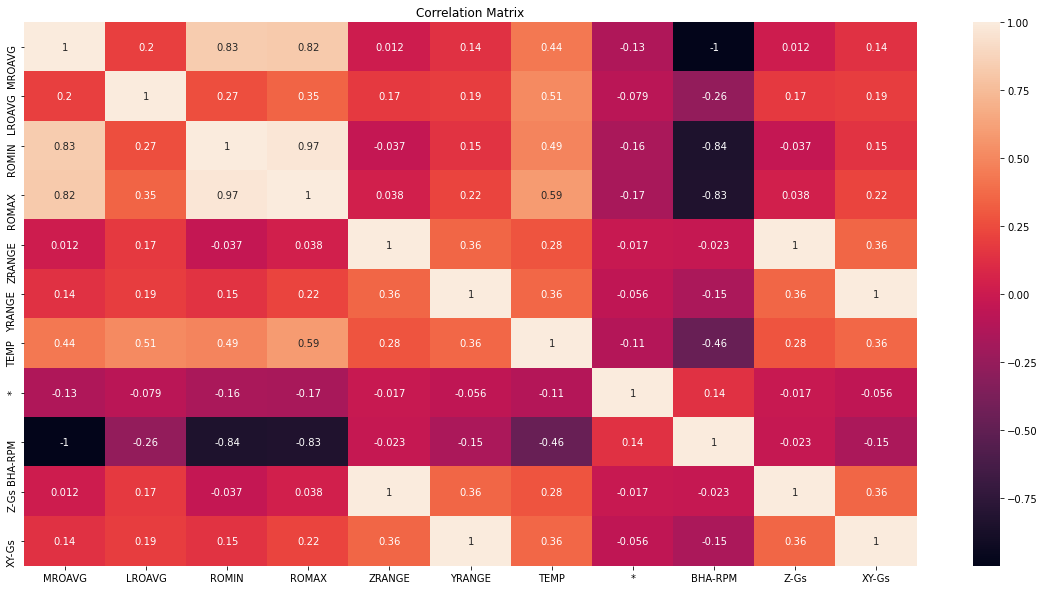

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

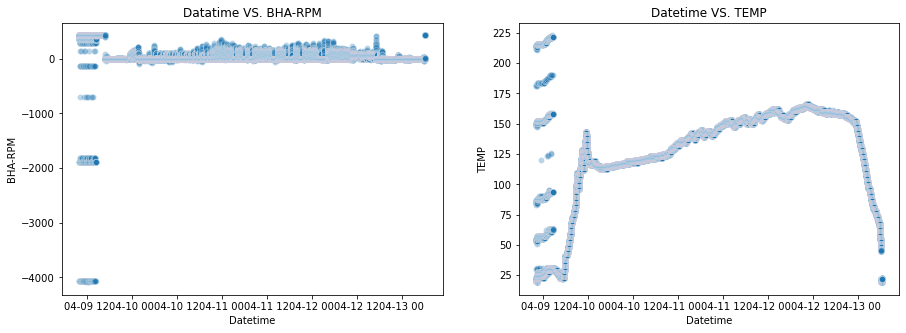

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x= df['Datetime'], y= df['BHA-RPM'], data=df, alpha=0.3, ax=axes[0])
axes[0].set_title('Datatime VS. BHA-RPM')

sns.scatterplot(x='Datetime', y='TEMP', data=df, alpha=0.3, ax=axes[1])
axes[1].set_title('Datetime VS. TEMP')

plt.show()

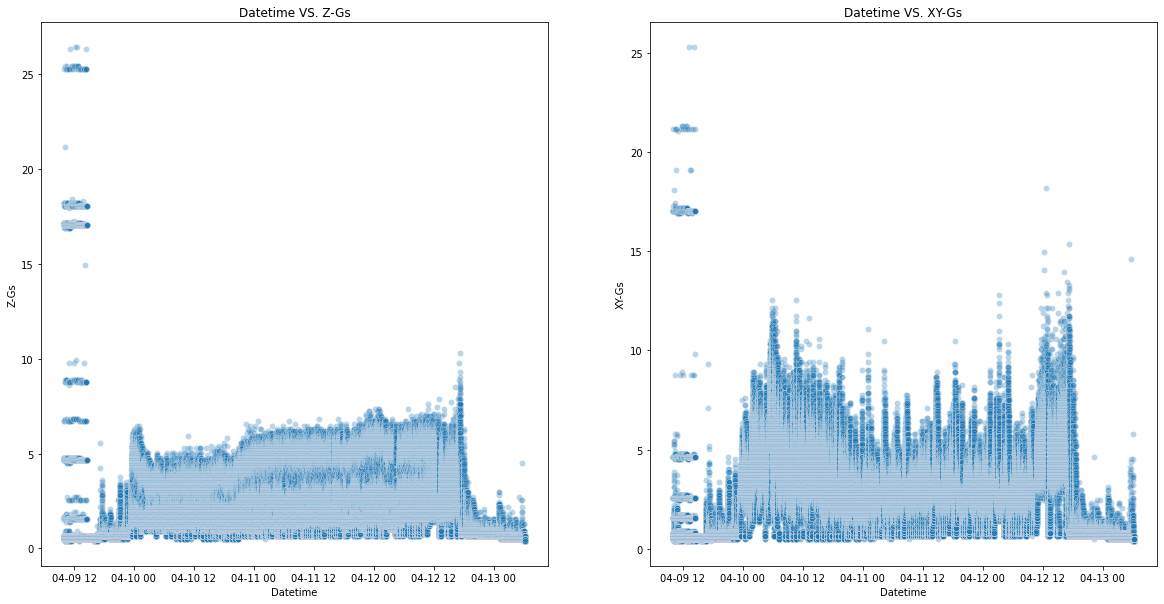

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x= df['Datetime'], y= df['Z-Gs'], data=df, alpha=0.3, ax=axes[0])
axes[0].set_title('Datetime VS. Z-Gs')

sns.scatterplot(x='Datetime', y=df['XY-Gs'], data=df, alpha=0.3, ax=axes[1])
axes[1].set_title('Datetime VS. XY-Gs')

plt.show()

In [31]:
#df.drop(df.loc[df['Datatime'] < '2018-04-09 15:59:03', "BHA-RPM"].index, inplace = True)

In [32]:
#df.drop(df.loc[df['BHA-RPM']  > -420, 'BHA-RPM'].index, inplace = True)

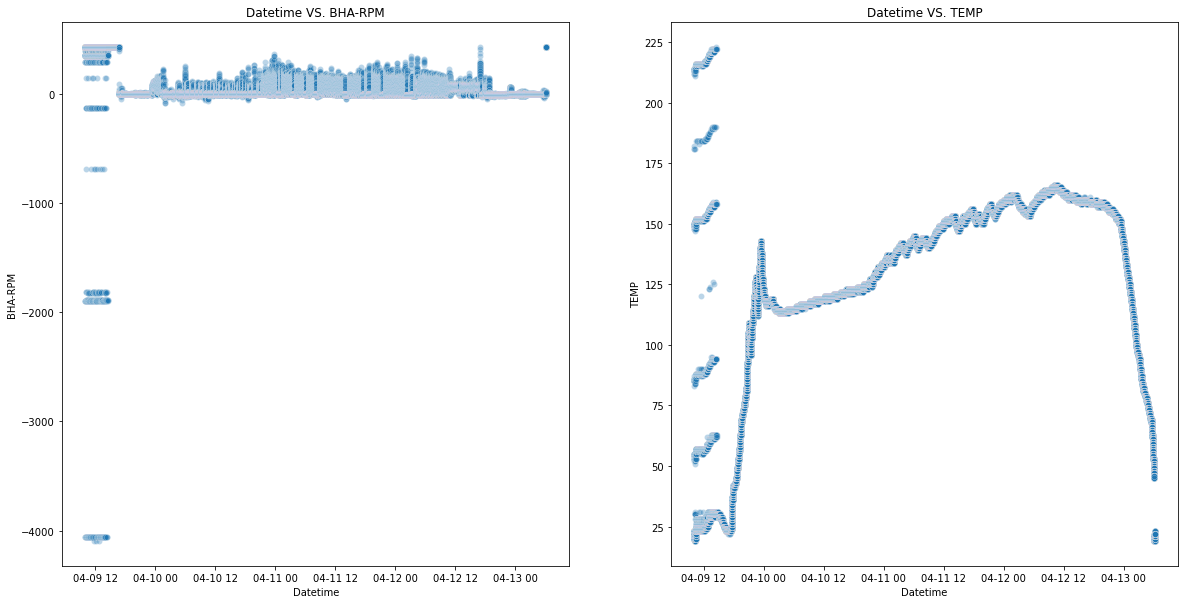

In [33]:
df.drop(df.loc[df['BHA-RPM']  < -420, 'BHA-RPM'].index, inplace = False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x= df['Datetime'], y= df['BHA-RPM'], data=df, alpha=0.3, ax=axes[0])
axes[0].set_title('Datetime VS. BHA-RPM')

sns.scatterplot(x='Datetime', y=df['TEMP'], data=df, alpha=0.3, ax=axes[1])
axes[1].set_title('Datetime VS. TEMP')

plt.show()

In [34]:
df.drop(df.loc[df['BHA-RPM']  < -200 , 'BHA-RPM'].index, inplace = True)

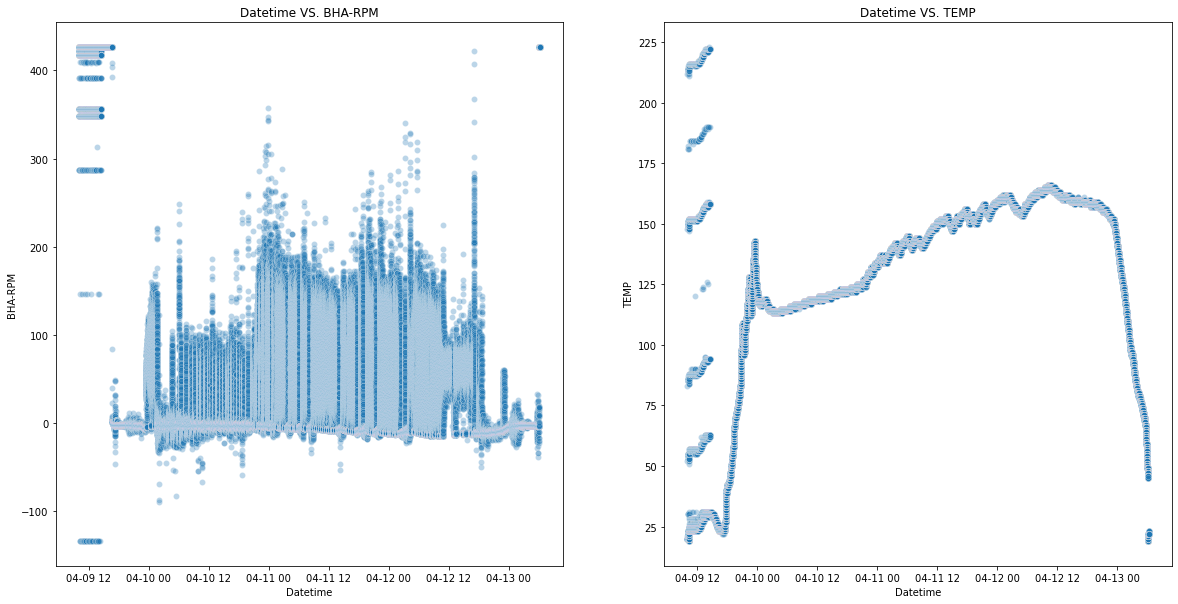

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x= df['Datetime'], y= df['BHA-RPM'], data=df, alpha=0.3, ax=axes[0])
axes[0].set_title('Datetime VS. BHA-RPM')

sns.scatterplot(x='Datetime', y=df['TEMP'], data=df, alpha=0.3, ax=axes[1])
axes[1].set_title('Datetime VS. TEMP')

plt.show()

# Shock and Vibration 
### Drop the first hour or so of the remove the Noise

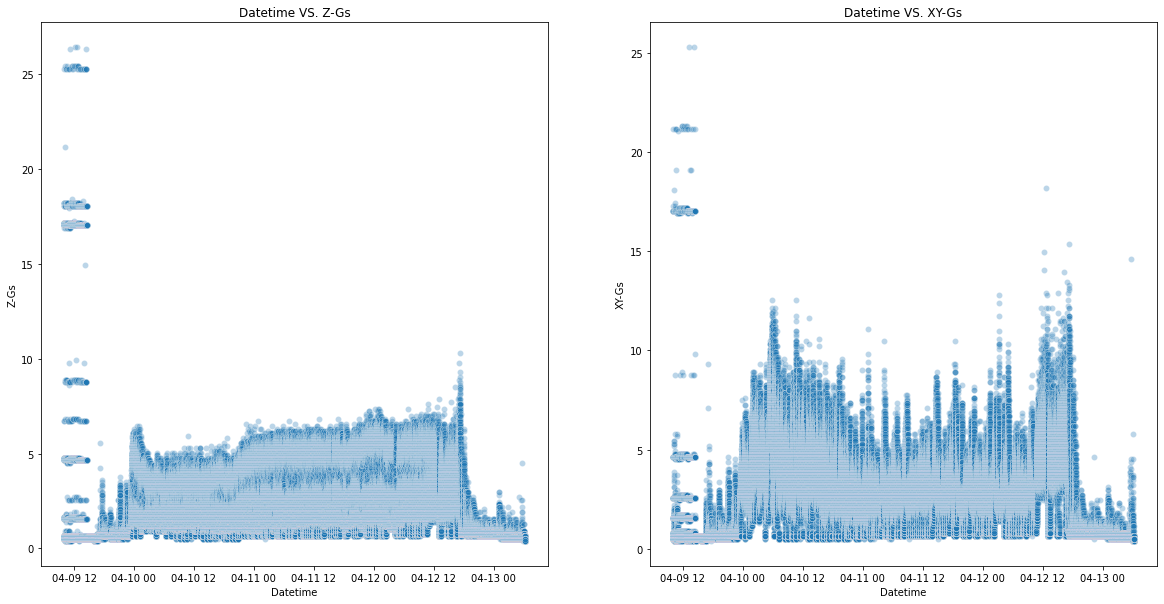

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x= df['Datetime'], y= df['Z-Gs'], data=df, alpha=0.3, ax=axes[0])
axes[0].set_title('Datetime VS. Z-Gs')

sns.scatterplot(x='Datetime', y=df['XY-Gs'], data=df, alpha=0.3, ax=axes[1])
axes[1].set_title('Datetime VS. XY-Gs')

plt.show()

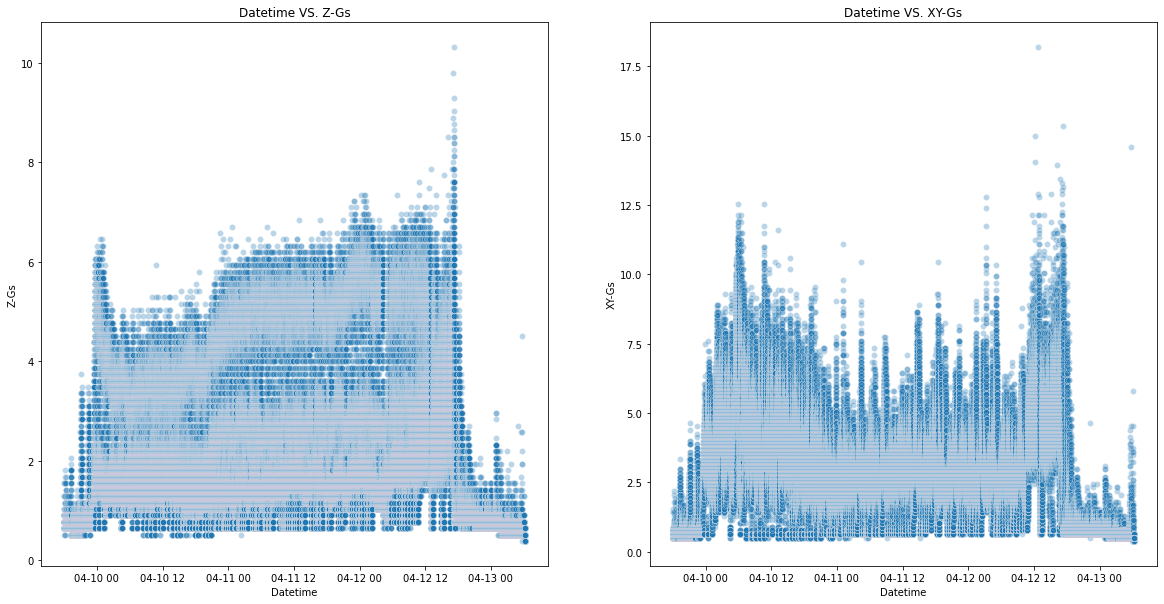

In [37]:
df.drop(df.loc[df['Datetime'] < '2018-04-09 17:59:03', "Z-Gs"].index, inplace = True)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x= df['Datetime'], y= df['Z-Gs'], data=df, alpha=0.3, ax=axes[0])
axes[0].set_title('Datetime VS. Z-Gs')

sns.scatterplot(x='Datetime', y=df['XY-Gs'], data=df, alpha=0.3, ax=axes[1])
axes[1].set_title('Datetime VS. XY-Gs')

plt.show()

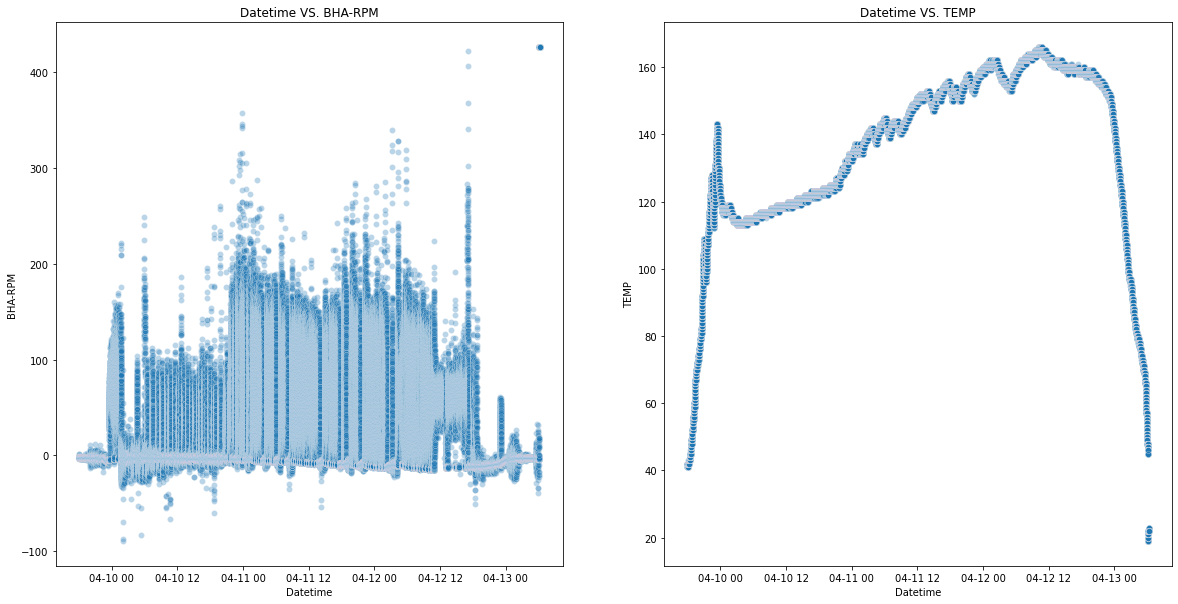

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x= df['Datetime'], y= df['BHA-RPM'], data=df, alpha=0.3, ax=axes[0])
axes[0].set_title('Datetime VS. BHA-RPM')

sns.scatterplot(x='Datetime', y=df['TEMP'], data=df, alpha=0.3, ax=axes[1])
axes[1].set_title('Datetime VS. TEMP')

plt.show()

In [39]:
df.drop(df.loc[df['BHA-RPM']  >425.694045 , 'BHA-RPM'].index, inplace = True)

In [40]:
df

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*,BHA-RPM,Z-Gs,XY-Gs,Datetime
57486,12,61,192,199,6,5,42,0,-2.190281,0.774194,0.645161,2018-04-09 17:59:03.000
57487,12,62,192,199,6,5,42,0,-2.327173,0.774194,0.645161,2018-04-09 17:59:03.500
57488,12,64,192,199,6,5,42,0,-2.600958,0.774194,0.645161,2018-04-09 17:59:04.000
57489,12,62,192,199,6,5,42,0,-2.327173,0.774194,0.645161,2018-04-09 17:59:04.500
57490,12,62,193,199,6,5,42,0,-2.327173,0.774194,0.645161,2018-04-09 17:59:05.000
...,...,...,...,...,...,...,...,...,...,...,...,...
664326,11,244,173,199,6,9,45,0,7.802875,0.774194,1.161290,2018-04-13 06:07:13.000
664327,12,45,170,200,5,9,46,0,0.000000,0.645161,1.161290,2018-04-13 06:07:13.500
664328,12,38,171,199,4,5,46,0,0.958248,0.516129,0.645161,2018-04-13 06:07:14.000
664329,11,232,172,199,5,7,45,0,9.445585,0.645161,0.903226,2018-04-13 06:07:14.500


### How many Z-Gs is over 12

In [41]:
Z_Gs_over_12 = (df['Z-Gs'].values > 12).sum()
Z_Gs_over_20 = (df['Z-Gs'].values > 20).sum()
Z_Gs_over_30 = (df['Z-Gs'].values > 30).sum()
Z_Gs_over_40 = (df['Z-Gs'].values > 40).sum()

print(Z_Gs_over_12)
print(Z_Gs_over_20)
print(Z_Gs_over_30)
print(Z_Gs_over_40)

0
0
0
0


### How many XY-Gs is over 12

In [42]:
XY_Gs_over_12 =(df['XY-Gs'].values > 12).sum()
XY_Gs_over_20 =(df['XY-Gs'].values > 20).sum()
XY_Gs_over_30 =(df['XY-Gs'].values > 30).sum()
XY_Gs_over_40 =(df['XY-Gs'].values > 40).sum()

print(XY_Gs_over_12)
print(XY_Gs_over_20)
print(XY_Gs_over_30)
print(XY_Gs_over_40)

28
0
0
0


# BHA-RPM positive and negative values counts 

### BHA-RPM over 200

In [43]:
(df['BHA-RPM'].values > 200).sum()

418

### BHA-RPM less 200 (include Negatives)

In [44]:
(df['BHA-RPM'].values <= 200).sum()

605367

### BHA-RPM less than Negative 10

In [45]:
RPM_less_than_Negative_10 = (df['BHA-RPM'].values <= -10).sum()
print('Number of RPM_less_than_Negative_10: ', RPM_less_than_Negative_10)

Number of RPM_less_than_Negative_10:  56350


### BHA-RPM less than Negative 100

In [46]:
RPM_less_than_Negative_100 = (df['BHA-RPM'].values <= -100).sum()
print('Number of RPM_less_than_Negative_100: ', RPM_less_than_Negative_100)

Number of RPM_less_than_Negative_100:  0


In [47]:
RPM_over_200 =(df['BHA-RPM'].values > 200).sum()
RPM_over_300 =(df['BHA-RPM'].values > 300).sum()
RPM_over_400 =(df['BHA-RPM'].values > 400).sum()

In [48]:
print('Number of RPM_over_200:', RPM_over_200)
print('Number of RPM_over_300:', RPM_over_300)
print('Number of RPM_over_400:', RPM_over_400)

Number of RPM_over_200: 418
Number of RPM_over_300: 25
Number of RPM_over_400: 2


Text(0.5, 1.0, 'Datetime VS. BHA-RPM')

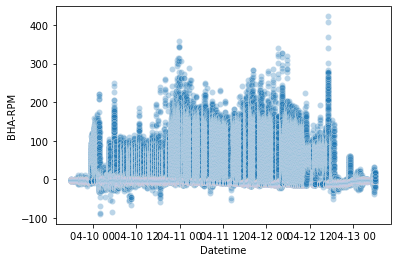

In [49]:
# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x= df['Datetime'], y= df['BHA-RPM'], data=df, alpha=0.3)
axes[0].set_title('Datetime VS. BHA-RPM')

In [50]:
percent_of_RPM_over_200 = RPM_over_200/(df['BHA-RPM'].values < 200).sum()*100
print('Percent of percent_of_RPM_over_200: ', percent_of_RPM_over_200)

Percent of percent_of_RPM_over_200:  0.06904913721616344


# How many percent of BHA-RPM is more than 200

In [51]:
print(percent_of_RPM_over_200)
print(RPM_over_200)

0.06904913721616344
418


In [52]:
"""yerror = 
plt.errorbar( df['BHA-RPM'].index, df['BHA-RPM'], yerr=yerror, fmt='o')"""

"yerror = \nplt.errorbar( df['BHA-RPM'].index, df['BHA-RPM'], yerr=yerror, fmt='o')"

In [53]:
temp_mean = df["TEMP"].mean()
temp_max = df['TEMP'].max()
temp_min = df['TEMP'].min()
temp_std = df['TEMP'].std()

In [54]:
BHA_RPM_mean = df['BHA-RPM'].mean()
BHA_RPM_max = df['BHA-RPM'].max()
BHA_RPM_min = df['BHA-RPM'].min()
BHA_RPM_std = df['BHA-RPM'].std()

In [55]:
Z_Gs_mean = df['Z-Gs'].mean()
Z_Gs_max = df['Z-Gs'].max()
Z_Gs_min = df['Z-Gs'].min()
Z_Gs_std = df['Z-Gs'].std()

In [56]:
XY_Gs_mean = df['XY-Gs'].mean()
XY_Gs_max = df['XY-Gs'].max()
XY_Gs_min = df['XY-Gs'].min()
XY_Gs_std = df['XY-Gs'].std()

In [57]:
df.describe()

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*,BHA-RPM,Z-Gs,XY-Gs
count,605785.000000,605785.000000,605785.000000,605785.000000,605785.000000,605785.000000,605785.000000,605785.0,605785.000000,605785.000000,605785.000000
mean,11.048403,101.660599,175.257144,190.421922,14.153977,21.248398,135.206757,0.0,25.591807,1.826320,2.741729
std,1.314964,56.391894,24.250672,15.910721,9.417467,12.586507,25.373515,0.0,43.457317,1.215157,1.624065
min,0.000000,0.000000,0.000000,25.000000,3.000000,4.000000,41.000000,0.0,-89.390828,0.387097,0.516129
25%,10.000000,63.000000,157.000000,181.000000,7.000000,8.000000,119.000000,0.0,-4.380561,0.903226,1.032258
50%,12.000000,84.000000,192.000000,199.000000,12.000000,21.000000,142.000000,0.0,-2.053388,1.548387,2.709677
75%,12.000000,128.000000,193.000000,201.000000,16.000000,29.000000,156.000000,0.0,56.947296,2.064516,3.741935
max,14.000000,254.000000,211.000000,255.000000,80.000000,141.000000,166.000000,0.0,422.450376,10.322581,18.193548


In [58]:
df

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*,BHA-RPM,Z-Gs,XY-Gs,Datetime
57486,12,61,192,199,6,5,42,0,-2.190281,0.774194,0.645161,2018-04-09 17:59:03.000
57487,12,62,192,199,6,5,42,0,-2.327173,0.774194,0.645161,2018-04-09 17:59:03.500
57488,12,64,192,199,6,5,42,0,-2.600958,0.774194,0.645161,2018-04-09 17:59:04.000
57489,12,62,192,199,6,5,42,0,-2.327173,0.774194,0.645161,2018-04-09 17:59:04.500
57490,12,62,193,199,6,5,42,0,-2.327173,0.774194,0.645161,2018-04-09 17:59:05.000
...,...,...,...,...,...,...,...,...,...,...,...,...
664326,11,244,173,199,6,9,45,0,7.802875,0.774194,1.161290,2018-04-13 06:07:13.000
664327,12,45,170,200,5,9,46,0,0.000000,0.645161,1.161290,2018-04-13 06:07:13.500
664328,12,38,171,199,4,5,46,0,0.958248,0.516129,0.645161,2018-04-13 06:07:14.000
664329,11,232,172,199,5,7,45,0,9.445585,0.645161,0.903226,2018-04-13 06:07:14.500


In [59]:
df.reset_index(drop = True, inplace = True)

In [60]:
df

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*,BHA-RPM,Z-Gs,XY-Gs,Datetime
0,12,61,192,199,6,5,42,0,-2.190281,0.774194,0.645161,2018-04-09 17:59:03.000
1,12,62,192,199,6,5,42,0,-2.327173,0.774194,0.645161,2018-04-09 17:59:03.500
2,12,64,192,199,6,5,42,0,-2.600958,0.774194,0.645161,2018-04-09 17:59:04.000
3,12,62,192,199,6,5,42,0,-2.327173,0.774194,0.645161,2018-04-09 17:59:04.500
4,12,62,193,199,6,5,42,0,-2.327173,0.774194,0.645161,2018-04-09 17:59:05.000
...,...,...,...,...,...,...,...,...,...,...,...,...
605780,11,244,173,199,6,9,45,0,7.802875,0.774194,1.161290,2018-04-13 06:07:13.000
605781,12,45,170,200,5,9,46,0,0.000000,0.645161,1.161290,2018-04-13 06:07:13.500
605782,12,38,171,199,4,5,46,0,0.958248,0.516129,0.645161,2018-04-13 06:07:14.000
605783,11,232,172,199,5,7,45,0,9.445585,0.645161,0.903226,2018-04-13 06:07:14.500


In [61]:
#df.to_excel(r'SN_0012.xlsx', index = False)

In [62]:
from csv import writer

def append_list_as_row(file_name, list_of_elem):
    # Open file in append mode
    with open(file_name, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem)

In [63]:
# List of strings
row_contents = [Job_info, shrimp_number, BHA_RPM_mean, BHA_RPM_max, BHA_RPM_min, BHA_RPM_std, RPM_over_200, RPM_over_300, RPM_over_400, percent_of_RPM_over_200, RPM_less_than_Negative_10, RPM_less_than_Negative_100,
                temp_mean, temp_max, temp_std, 
                Z_Gs_mean, Z_Gs_max, Z_Gs_std, Z_Gs_over_12, Z_Gs_over_20, Z_Gs_over_30, Z_Gs_over_40, 
                XY_Gs_mean, XY_Gs_max, XY_Gs_std, XY_Gs_over_12, XY_Gs_over_20, XY_Gs_over_30, XY_Gs_over_40]
# Append a list as new line to an old csv file
append_list_as_row('SHRIMP Report.csv', row_contents)